# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Ход исследования**

1. Изучить общую информацию, т.е. сделать обзор данных.
2. Предобработка данных:
- Найти и изучить пропущенные значения в столбцах
- Рассмотреть типы данных в столбце
- Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты. 
- Найти и устранить редкие и выбивающиеся значения
3. Добавить в таблицу новые столбцы
4. Провести исследовательский анализ данных
5. Общий вывод


## Откройте файл с данными и изучите общую информацию. 

In [2]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Загружаем данные из файла в датафрейм. Указываем два пути, как открыть файл: в локальном юпитере и в тренажёре
try:
    data = pd.read_csv('/Users/User/Downloads/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [4]:
# Получаем общую информацию о полученном датафрейме.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

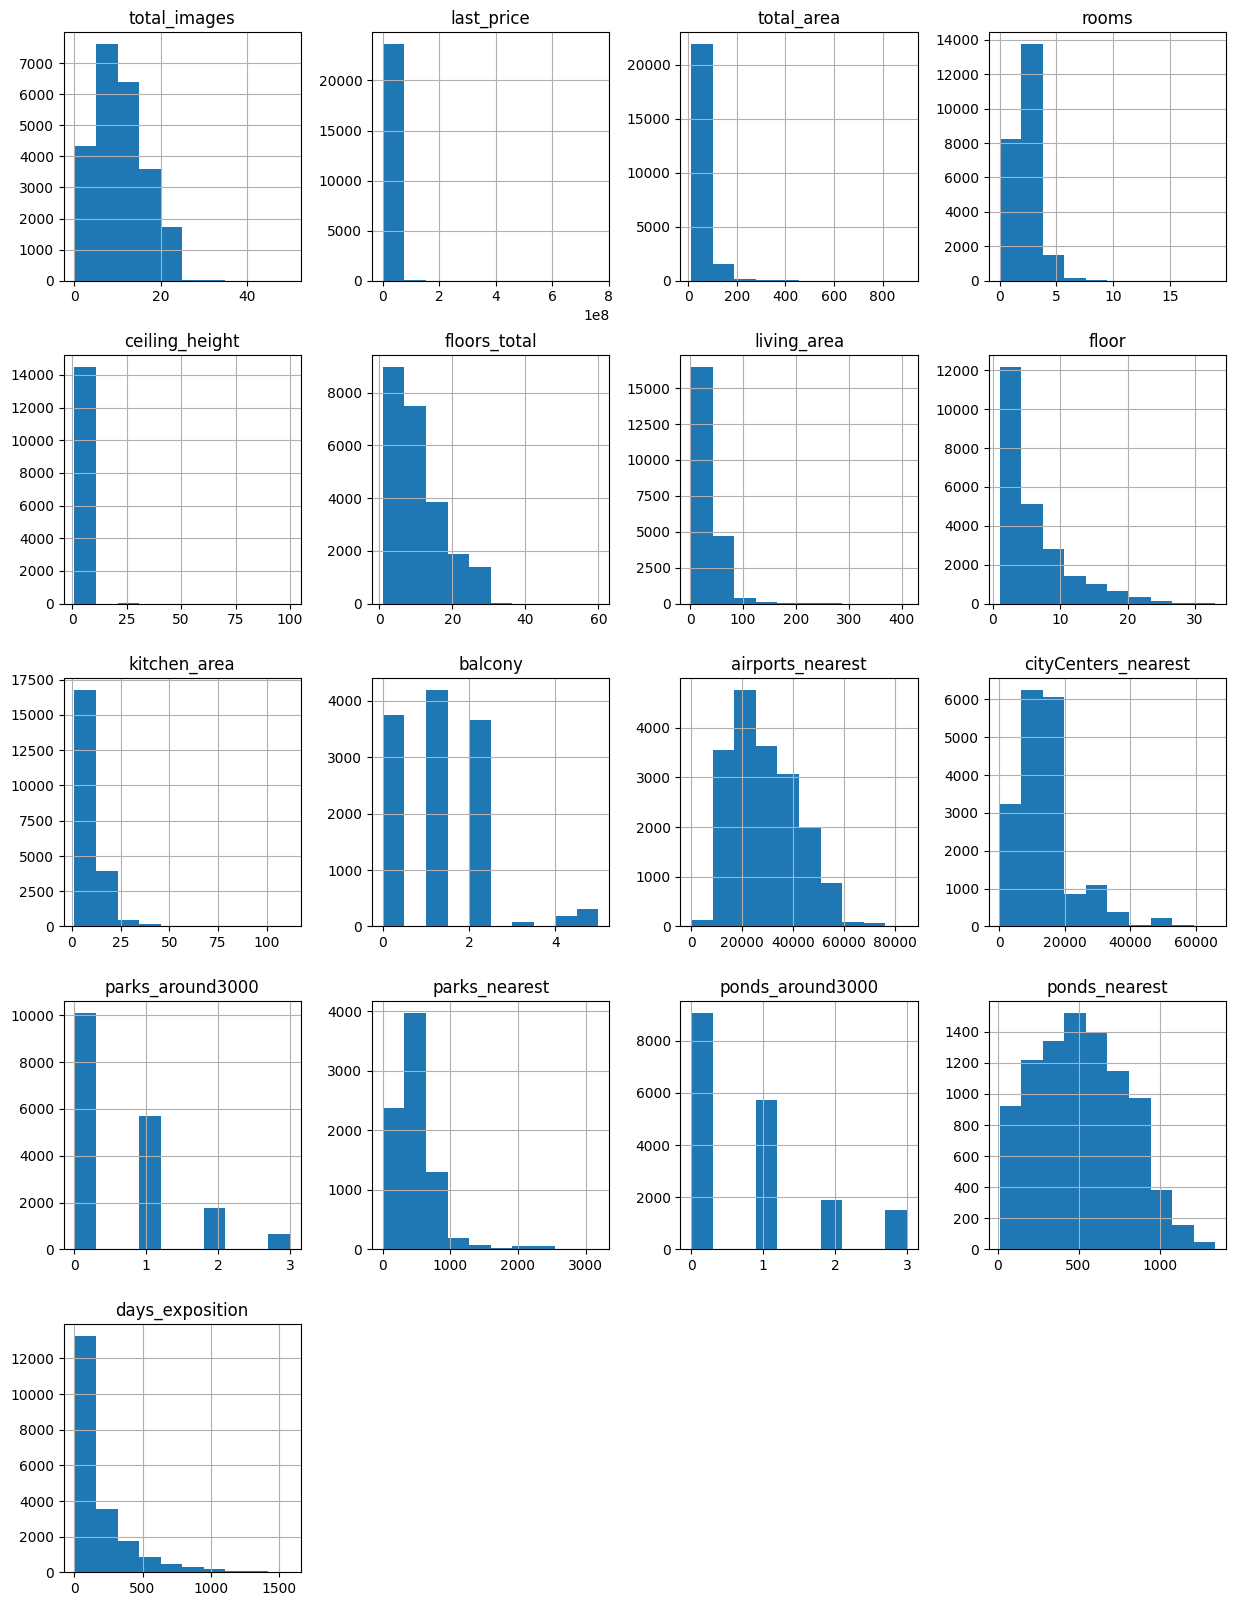

In [5]:
# Строим общую гистограмму для всех числовых столбцов таблицы.
data.hist(figsize=(15, 20))
plt.show()

**Вывод**
Изучив первые гистограммы, видим, что в основном объекты недвижимости имеют общую площадь до 100 кв.м., 3 комнтаты, расположены в многоэтажных домах до 10 этажа до 20 км от центра города. Срок размещения объявления до 200 дней. Рассмотрим данные подробнее, но для этого сначала сделаем предобработку данных.

## Предобработка данных

### Находим и изучаем пропущенные значения в столбцах:

In [6]:
# data.isna().sum()
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Вывод:**
Видим, что пропуски есть во всех столбцах, кроме total_images (число фотографий квартиры в объявлении), last_price(цена на момент снятия с публикации), total_area(общая площадь), first_day_exposition (дата публикации), rooms(число комнат), floor (этаж), studio (квартира-студия), open_plan(свободная планировка). Очень мало пропущенных значений в столбце locality_name (название населённого пункта). Отсутствие пропусков их маленькое значение в столбцах вероятно связано с тем, что это основные критерии поиска недвижимости, дата публикации скорее всего устанавливается автоматически.Больше всего пропусков в столбцах, которые не имеют стратегического значения, такие как наличие парка, водоема.

Заполним пропущенные значения в столбцах, где это возможно.
 Начнем со столбца ceiling_height (высота потолков). Заполним пропущенные значения средним значением столбца ceiling_height. Аналогично поступим со столбцами living_area, kitchen_area, days_expositions.

In [7]:
def mean_value(column):
    data[column] = data[column].fillna(data[column].mean())
    return data[column]

mean_value(['ceiling_height', 'living_area', 'kitchen_area', 'days_exposition'])

,ceiling_height,living_area,kitchen_area,days_exposition
0,2.700000,51.000000,25.000000,180.888634
1,2.771499,18.600000,11.000000,81.000000
2,2.771499,34.300000,8.300000,558.000000
3,2.771499,34.457852,10.569807,424.000000
4,3.030000,32.000000,41.000000,121.000000
...,...,...,...,...
23694,3.700000,73.300000,13.830000,180.888634
23695,2.771499,38.000000,8.500000,45.000000
23696,2.771499,29.700000,10.569807,180.888634
23697,3.000000,34.457852,23.300000,602.000000


In [8]:
#  Большое число пропущенных значений в столбце балконы возможно обусловлено тем, что не все дома имеют балконы,
# поэтому их скорее всего на самом деле нет.
data['balcony'] = data['balcony'].fillna(0)

In [9]:
# В столбце is_apartment большое количество пропусков, предположим, что данная недвижимость не является аппартаментами,
# и пропущенным значениям присвоим значение False
data['is_apartment'] = data['is_apartment'].fillna(value = 'False')

In [10]:
# удалим пропуски в столбце floors_total, так как их немного, а оставлять их нецелесообразно,
# так как пропущенные значения могут мешать дальнейшему исследованию
data['floors_total'] = data['floors_total'].fillna(0)
data = data[data['floors_total'] != 0]

Пропуски в столбце locality_name заполнять не будем, так как их очень мало, их можно просто проигнорировать. В остальных столбцах заполним пропуски медианой, так как расстояние сильно отличается, поэтому среднее значение может быть не точным.

In [11]:
def median_value(column):
    data[column] = data[column].fillna(data[column].median())
    return data[column]

median_value(['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'])

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,18863.0,16028.0,1.0,482.0,2.0,755.0
1,12817.0,18603.0,0.0,455.0,0.0,503.0
2,21741.0,13933.0,1.0,90.0,2.0,574.0
3,28098.0,6800.0,2.0,84.0,3.0,234.0
4,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...
23694,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,26726.0,13093.0,0.0,455.0,1.0,503.0
23696,26726.0,13093.0,0.0,455.0,1.0,503.0
23697,39140.0,10364.0,2.0,173.0,3.0,196.0


In [12]:
# проверяем снова наличие пропущеннных значений, после обработки данных.
data.isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           48
airports_nearest         0
cityCenters_nearest      0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
dtype: int64

**Вывод**
В данных достаточно большое количество пропущенных значений. В основном пропущены значения в столбцах, которые не являются основными критериями для выбора недвижимости, такие как расстояние до центра города, аэропорта, поэтому их могли просто не заполнять в объявлениях, чтобы не тратить время. Пропуски в столбце апартаменты вероятно вызваны тем, что в объявлении указывали их наличие, а если недвижимость не является апартаментами, эту графу просто пропускали.

### Рассмотрим типы данных в каждом столбце:

In [13]:
data['floors_total'] = data['floors_total'].astype('Int64')
data['balcony'] = data['balcony'].astype('int64')
data['days_exposition'] = data['days_exposition'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

Меняем тип данных столбца floors_total, balcony, days_exposition на int  так как количество этажей, балконов и дней может быть только целочисленным. Данные столбца is_apartment меняем на булевый тип, так как значения, либо True, либо False. 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  Int64  
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

### Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты.

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].replace(['посёлок Мурино','Мурино'], 'посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Рябово', 'посёлок Рябово')

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет

Основной причиной неявных дубликатов является написание слова посёлок(буква е и ё). Также есть просто названия без уточнения категории населенного пункта. Считаю нецелесообразным удалять слова село, поселок, город. Так как у нас в Росси много населенных пунктов с одинаковым названием, но какие-то из них сёла, какие-то посёлки. Если проверять каждое по карте, уйдет много времени, а это не сильно повлияет на анализ данных.

### Находим и устраняем редкие и выбивающиеся значения. 

In [18]:
for column in data.columns:
    print(column, data[column].unique())

total_images [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
total_area [108.    40.4   56.   ...  66.86 133.81  76.75]
first_day_exposition ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
rooms [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
ceiling_height [  2.7         2.7714989   3.03        2.5         2.67        2.56
   3.05        2.75        2.6         2.9         2.8         2.55
   3.          2.65        3.2         2.61        3.25        3.45
   2.77        2.85        2.64        2.57        4.15        3.5
   3.3         2.71        4.          2.47        2.73        2.84
   3.1         2.34        3.4         3.06        2.72        2.54
   2.51        2.78        2.76       25.          2.58        3.7
   2.52        5.2        

balcony [0 2 1 5 4 3]
locality_name ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'посёлок городского типа Красный Бор' 'Гатчина' 'деревня Фёдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'посёлок Металлострой' 'посёлок городского типа Лебяжье'
 'посёлок городского типа Сиверский' 'посёлок Молодцово'
 'посёлок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'деревня

In [19]:
# Меняем высоту потолков на норматив, принятый в стране - 2,5 метра
data.loc[(data['ceiling_height'] >= 8) | (data['ceiling_height'] < 2.5), 'ceiling_height'] = 2.5

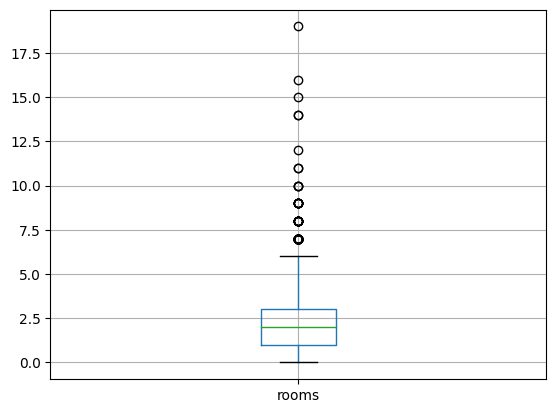

In [20]:
# Считаем количество строк, в которых комнаты имеют нулевое значение
data.loc[data['rooms'] == 0, 'rooms'].count()
data.boxplot(column=['rooms'])
plt.show()

In [21]:
# в данных оставдяем те строки, в которых количество комнат не равно 0 и проверяем остались ли данные в таблице
data = data.query('rooms != 0')
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [22]:
# Проверяем явные дубликаты
data.duplicated().sum()

0

Видим, что в данных не так много выбивающихся значений. Большие значения в данных столбца высота потолков. Логично заключить, что при в воде данных пропустили точку, поэтому потолки выше 20 м поделили на 10. Таким образом убрали нереальные значения.
Также указаны очень большие значения в столбцах airports_nearest и cityCenters_nearest. Возможно это обусловлено тем, что учитано расстояние в метрах. Но на следующем шаге переведем это расстояние в километры. Еще в столбце rooms видим, что есть 0. всего 194 строк. Это небольшое количество и так как квартиры не могут быть с нулевыми комнатами, минимум есть 1, то решила удалить эти строки. Явных дубликатов нет. 

**Добавим в таблицу новые столбцы со следующими параметрами:**
цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [23]:
# Считаем стоимость квадратного метра и создаем отдельную колонку
data['square_meter_price'] = data['last_price'] / data['total_area']

In [24]:
# Переводим из строки в дату и время. Создаем столбцы день, месяц, год публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['week_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month_exposition1'] = data['first_day_exposition'].astype('datetime64[M]')
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [25]:
#Создаем новый столбец, в котором будет указан тип этажа квартиры. Создадим функцию для одной строки
def flat_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(flat_floor_type, axis = 1)

In [26]:
#  переводим расстояние до центра города из м в км и округляем до целых значений.
data['center_nearest_kilometr'] = round((data['cityCenters_nearest'] / 1000), 0)
# проверяем наличие новых столбцов
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,month_exposition,month_exposition1,year_exposition,floor_type,center_nearest_kilometr
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,True,...,2,755.0,180,120370.370370,3,3,2019-03-01,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,True,...,0,503.0,81,82920.792079,1,12,2018-12-01,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,True,...,2,574.0,558,92785.714286,3,8,2015-08-01,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,34.457852,9,True,...,3,234.0,424,408176.100629,4,7,2015-07-01,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,True,...,1,48.0,121,100000.000000,1,6,2018-06-01,2018,другой,8.0


**Вывод:** Добавили в таблицу новые столбцы со следующими параметрами: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах.

## Проведите исследовательский анализ данных

### Изучим следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
Построим отдельные гистограммы для каждого из этих параметров.

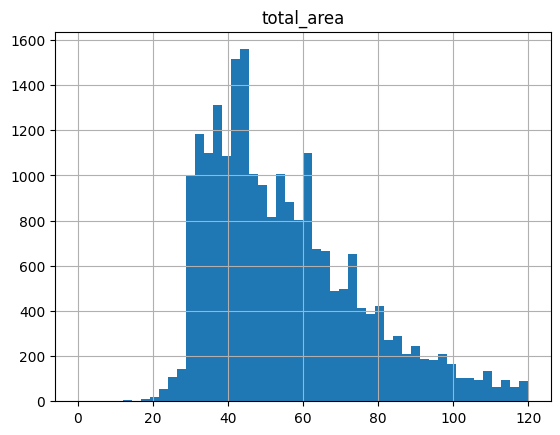

In [27]:
# Строим гистограмму общей площади
data.hist('total_area', bins = 50, range = (0, 120))
plt.show()

Видим, что основная доля - это недвижимость площадью до 100 кв м, а именно от 30 до 70 кв.м.

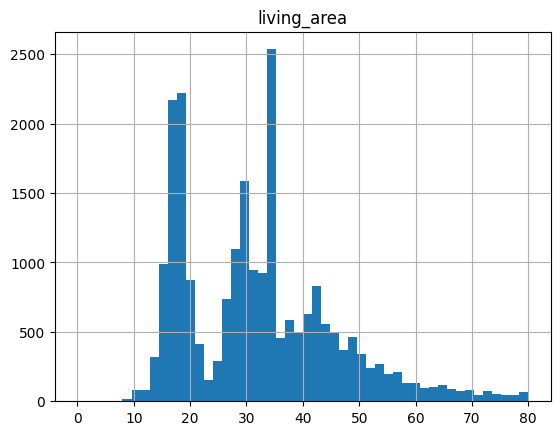

In [28]:
# гистограмма по столбцу жилая площадь
data.hist('living_area', bins = 50, range = (0, 80))
plt.show()

Из гафика видим, что больше всего недвижимости, которая имеет жилую площадь до 50 кв.м., пики от 15 до 35 кв.м.

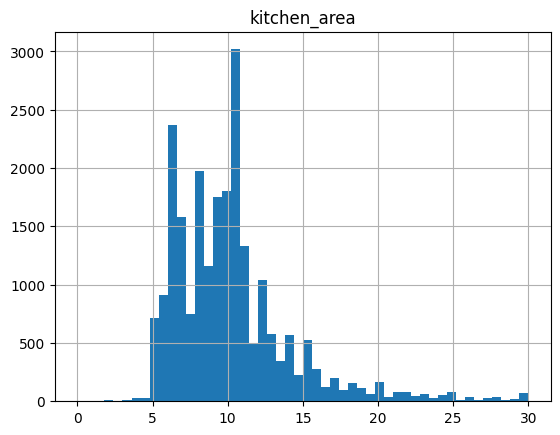

In [29]:
# Строим график столбца площадь кухни
data.hist('kitchen_area', bins = 50, range = (0, 30))
plt.show()

Больше половины объектов имеет размер кухни 10 кв.м.

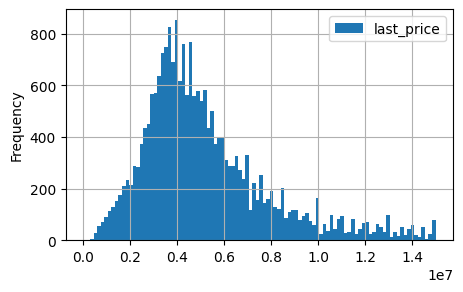

In [30]:
# Строим график стоимости недвижимости
# data['last_price'].plot(style = 'o',grid = True)
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
plt.show()

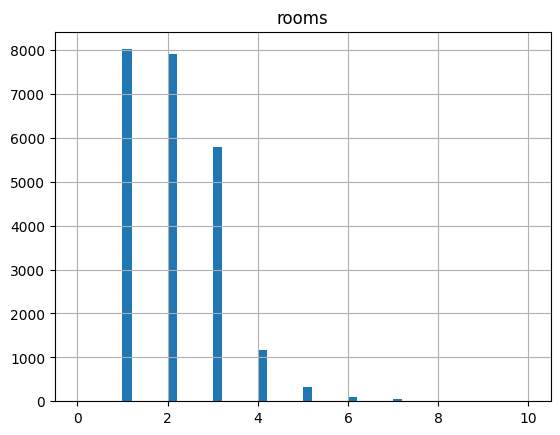

In [31]:
# Гистограмма для изучения количества комнат
data.hist('rooms', bins = 50, range = (0, 10))
plt.show()

В основном продается недвижимость с 1, 2 и 3 комнатами

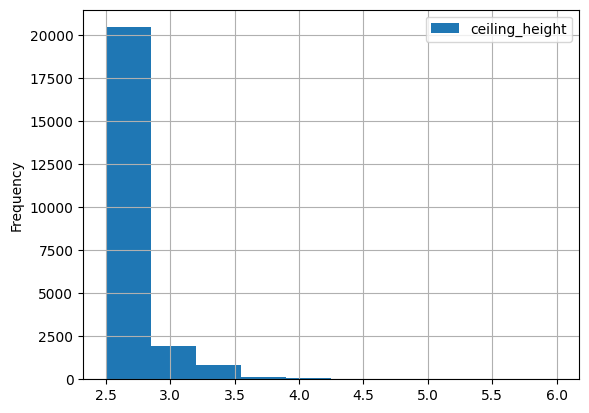

In [32]:
# Изучаем высоту потолков на гистограмме
data.plot(y = 'ceiling_height', kind = 'hist',grid = True)
plt.show()

На графике видно, что убрали аномальные значения из столбца высота потолков. В основном это высота от 2,5 до 3 м

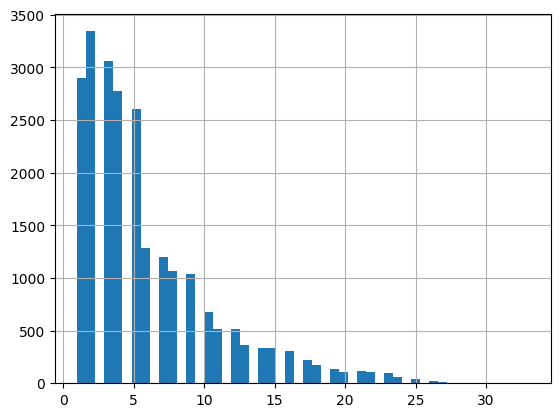

In [33]:
# Гистограмма для столбца Этаж
data['floor'].hist(bins = 50)
plt.show()

Большой процент недвижимости продается до 10 этажа.

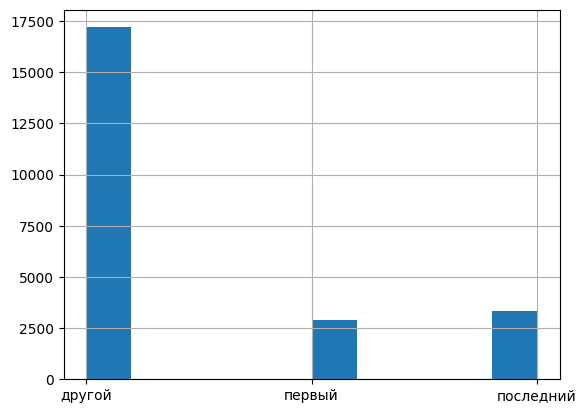

In [34]:
# Гистограмма для столбца тип этажа
data['floor_type'].hist(bins = 10)
plt.show()

Первый и последний этажи продаются меньше, чем другие. Примерно по 3-4 тысячи. Но общий процент первого и последнего этажей получается не маленький. Видимо всё-таки люди хотят перебраться на более комфортные этажи без подвала и крыши.

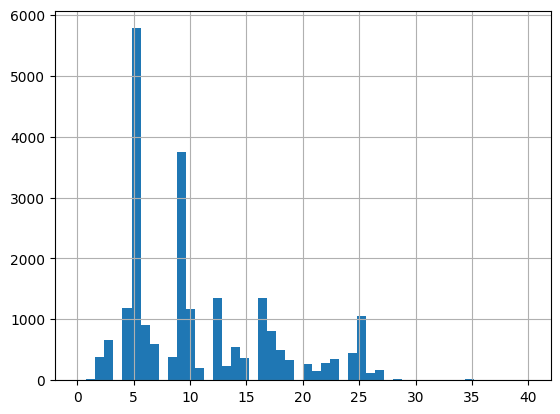

In [35]:
data['floors_total'].hist(bins = 50, range = (0, 40))
plt.show()

в основновном продаются квартиры в 5ти и 9ти этажных домах

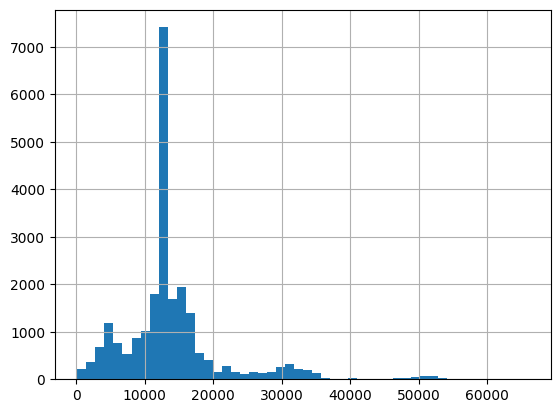

In [36]:
# Расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins = 50)
plt.show()

В основном недвижимость продается на расстоянии 10-12 тыс метров(10-12 км)

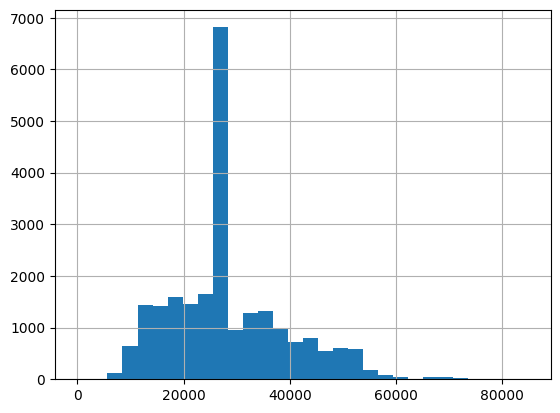

In [37]:
# Расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins = 30)
plt.show()

Чаще всего продаваемая недвижимость находится на расстоянии 30 км от аэропорта

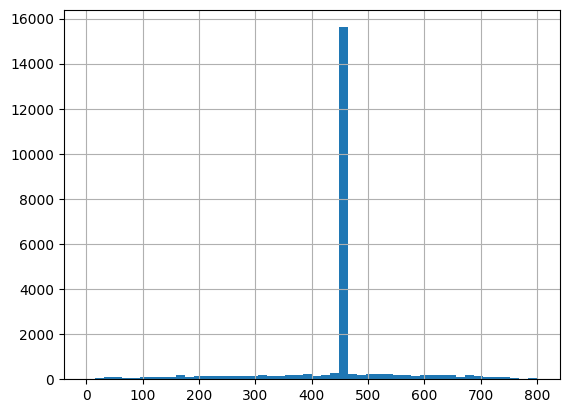

In [38]:
# Расстояние до ближайшего парка примерно
data['parks_nearest'].hist(bins = 50, range = (0, 800))
plt.show()

Расстояние до ближайшего парка в среднем 450 м

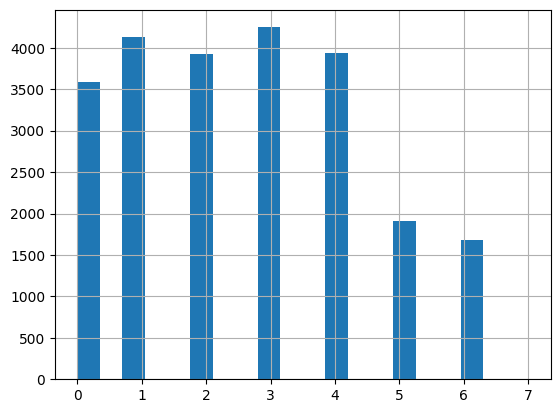

In [39]:
# день публикации объявления
data['week_day_exposition'].hist(bins = 20, range = (0, 7))
plt.show()

В будни публикуется объявлений недвижимости почти в два раза больше, чем в выходные.

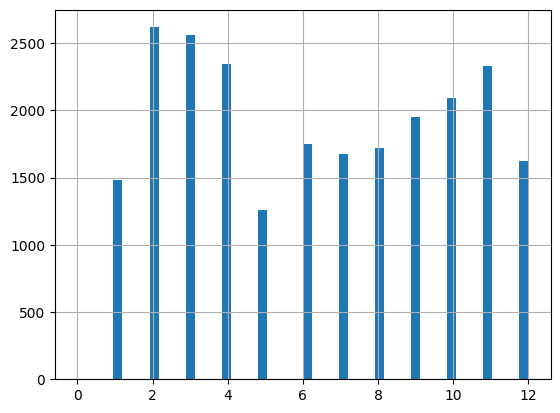

In [40]:
# день публикации объявления
data['month_exposition'].hist(bins = 50, range = (0, 12))
plt.show()

Основные месяцы публикации объявления - это февраль, март, апрель, октябрь, ноябрь. Зимой и летом объявления о продаже недвижимости размещают меньше, чем весной и летом

**Вывод** 
Видим, что основная доля - это недвижимость площадью до 100 кв м, что больше всего недвижимости, которая имеет жилую площадь до 50 кв.м., больше половины объектов имеет размер кухни 10 кв.м. В основном продается недвижимость с 1, 2 и 3 комнатами, имеет высоту потолков 2,5 - 3 м. В основном продаются квартиры до 10 этажа, на первых и последних намного меньше. Месторасположение - на протяженности 10 км от центра города и 30 км от аэропорта. Основные дни публикации объявления - это будни. Основные продажи - это весна, осень.

### Изучим, как быстро продавались квартиры (столбец days_exposition). 
Этот параметр показывает, сколько дней было размещено каждое объявление.
Построим гистограмму.
Посчитаем среднее и медиану.

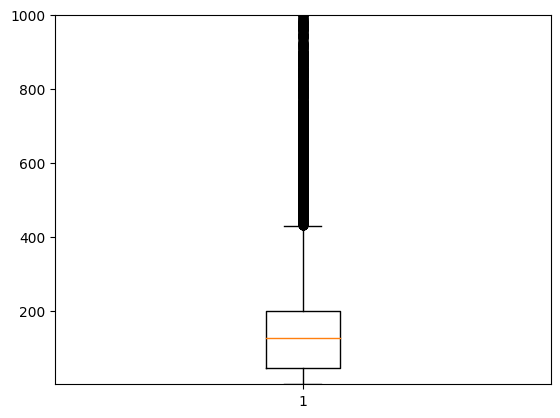

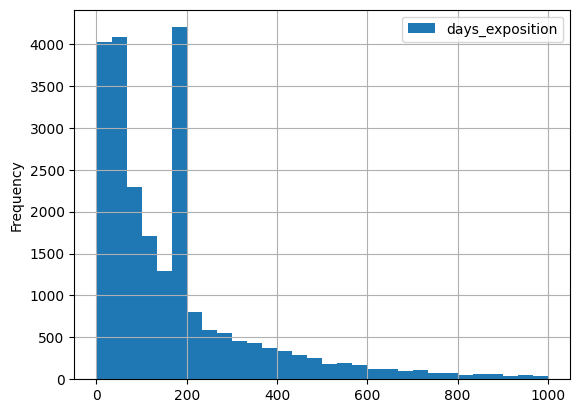

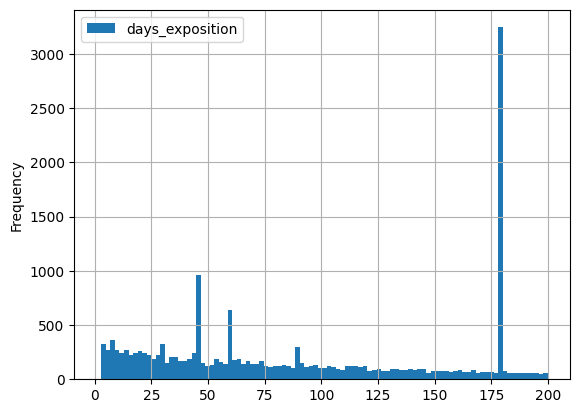

count    23419.00000
mean       181.30787
std        204.67216
min          1.00000
25%         45.00000
50%        125.00000
75%        199.00000
max       1580.00000
Name: days_exposition, dtype: float64

In [41]:
# Строим гистограмму размещения публикации на 1000 и 200 дней. 
plt.boxplot(data['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1000))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
plt.show()
#среднее значение, медиана и межквартильный размах
data['days_exposition'].describe()


Исходя из метода describe, межквартильный размах - от 45 до 199 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 400 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 400 дней и выше. Значит нормальные значения у нас лежат от 1 до 500.

### Изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

,count,mean
,last_price,last_price
total_area,,
12.0,1,2400000.0
13.0,3,2350000.0
13.2,1,1686000.0
14.0,1,1190000.0
15.0,2,1725000.0
...,...,...
590.0,1,65000000.0
618.0,1,300000000.0


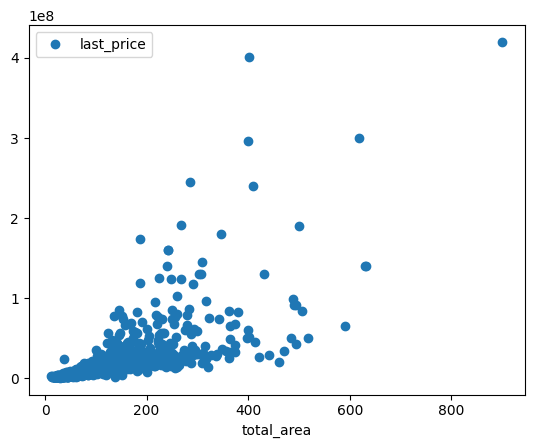

0.6530223691644658

In [42]:
# Есть ли зависимость цены от общей площади?
total_area_debt_pivot = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['count', 'mean'])
display(total_area_debt_pivot)
total_area_debt_pivot.plot(y = 'mean', style = 'o')
plt.show()

# считаем корреляцию
data['total_area'].corr(data['last_price'])

Видим, что стоимость увеличивается от размера общей площади. Коэффициент корреляции Пирсона - 0,65(положительный). Это говорит о том, что с увеличением общей площади увеличивается и стоимость.

,count,mean
,last_price,last_price
living_area,,
2.0,1,6350000.0
3.0,2,34715000.0
5.4,1,6100000.0
6.0,1,3799000.0
6.5,1,4050000.0
...,...,...
322.3,1,140000000.0
332.0,1,50000000.0


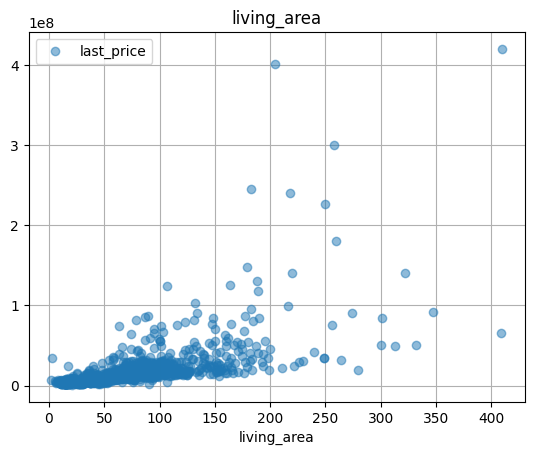

0.5421376370588409

In [43]:
# Есть ли зависимость цены от жилой площади?
living_area_debt_pivot = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['count', 'mean'])
display(living_area_debt_pivot)
living_area_debt_pivot.plot(title = 'living_area', y = 'mean', style = 'o', grid = True, alpha = 0.5)
plt.show()
# считаем корреляцию
data['living_area'].corr(data['last_price'])

Видим, что зависимость цены от жилой площади примерно такая же, как зависимость цены от общей площади квартиры. Стоимость увеличивается в зависимости от увеличения жилой площади, но это связано с тем, что общая площадь тоже увеличивается, значит количество метров больше и соответственно цена тоже больше. Но по корреляции Пирсона - 0,54 видно, что увеличение не значительное, меньше чем зависимость цены от общей площади.

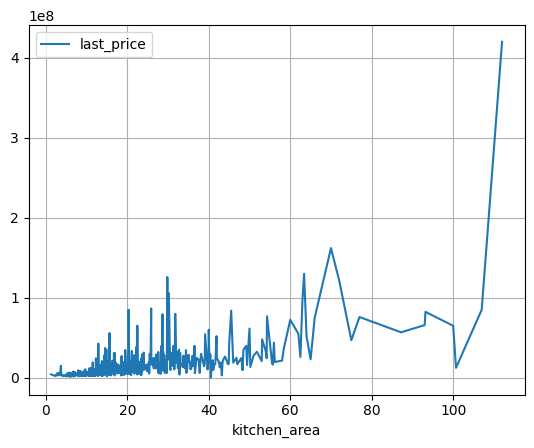

In [44]:
# Есть ли зависимость цены от жилой площади?
kitchen_area_debt_pivot = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['count', 'mean'])
kitchen_area_debt_pivot.plot(y = 'mean', grid = True)
plt.show()

Видим, что размер кухни влияет на стоимость. стоимость резко увеличивается, если кухни имеют площадь от 10 кв.м. Но если кухни больше 20 м, значит и сам объект больше и тут мы не наблюдаем резкого роста цен.

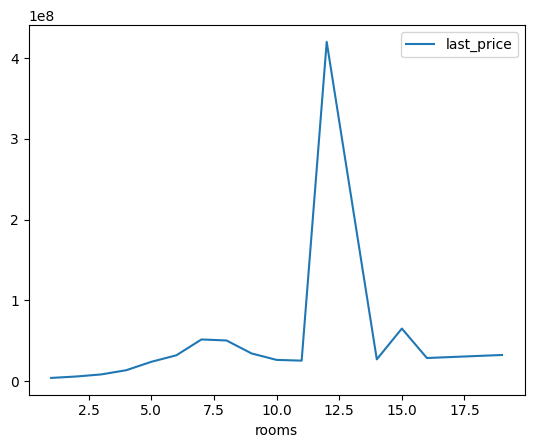

In [45]:
# Зависимость цены от количества комнат.
rooms_debt_pivot = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'mean'])
rooms_debt_pivot.plot(y = 'mean')
plt.show()

На графике отчетливо видно, что цена квартиры увеличивается от количества комнат. 

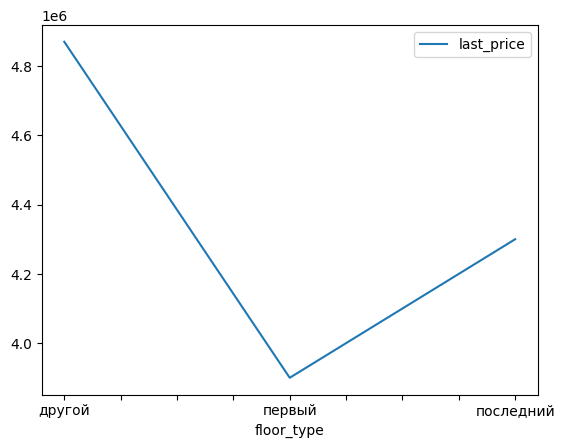

In [46]:
# Зависит ли цена от того, на каком этаже расположена квартра?
floor_type_debt_pivot = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['count', 'median'])
floor_type_debt_pivot.plot(y = 'median')
plt.show()

Цена напрямую зависит от того, на каком этаже расположена квартира. Самая низкая стоимость квартир на первом этаже. На последнем выше,чем на первом. Квартиры не на первом и не на последнем этажах стоят намного дороже

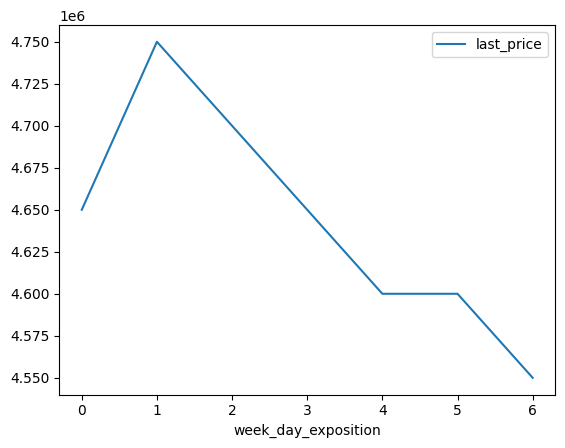

In [47]:
# Зависимость цены от дня размещения объявления
weekday_exposition_debt_pivot = data.pivot_table(index = 'week_day_exposition', values = 'last_price', aggfunc = ['count', 'median'])
weekday_exposition_debt_pivot.plot(y = 'median')
plt.show()

Самая высокая стоимость размещения во вторник, а к выходным падает. Возможно это обусловлено тем, что количество публикаций объявлений в первые дни недели намного больше, а в выходные объявлений размещают меньше.

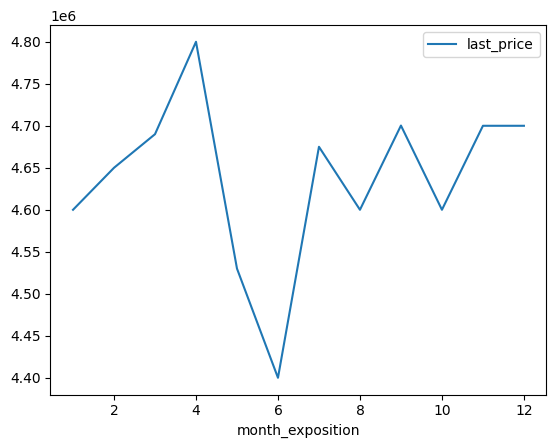

In [48]:
# Зависимость цены от месяца размещения объявления
month_exposition_debt_pivot = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['count', 'median'])
month_exposition_debt_pivot.plot(y = 'median')
plt.show()

Стоимость недвижимости напрямую  зависит от месяца публикации. Самая высокая цена весной, так как на предыдущих графиках мы видели, что весной больше всего размещается объявлений. Это самый сезон продаж. Самая низкая стоимость летом, так количество продаж редко падает. А к осени стоимость снова увеличивается.

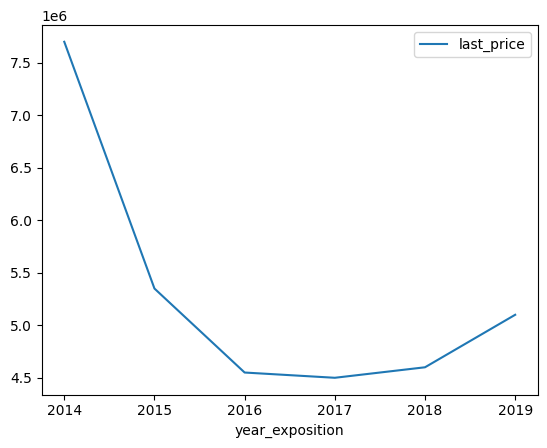

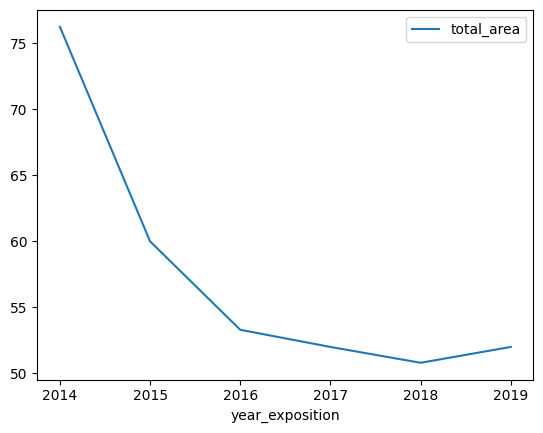

In [49]:
# Зависимость цены от года размещения объявления
year_exposition_debt_pivot = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['count', 'median'])
year_exposition_debt_pivot.plot(y = 'median')

# динамикa цены и площади продаваемых квартир
year_exposition_pivot_table = data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['count', 'median'])
year_exposition_pivot_table.plot(y = 'median')
plt.show()

Самая большая стомость недвижимости была в 2014 году, к 2016 резко упала, и только к 2019 году начала немного увеличиваться. На втором графике видим возможные причины резкого падения стоимости. Это связано с тем, что падает площадь продаваемой недвижимости, соответственно и цена.

**Вывод:** На общую (полную) стоимость объекта больше всего влияют следующие факторы: общая площадь, количество комнат, этаж, день, месяц и год публикации.

### Посчитайте среднюю цену одного квадратного метра
в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name

In [50]:
data['square_metr_price'] = data['last_price'] / data['total_area']
locality_debt_pivot = data.pivot_table(index = 'locality_name', values = 'square_metr_price', aggfunc=['count', 'median'])
locality_debt_pivot.columns = ['count', 'median']
locality_debt_pivot = locality_debt_pivot.sort_values('count', ascending = False).head(10)
display(locality_debt_pivot)
#самая высокая стоимость
print('Самая высокая стоимость')
display(locality_debt_pivot[locality_debt_pivot['median'] == locality_debt_pivot['median'].max()])
#самая низкая стоимость
print('Самая низкая стоимость')
display(locality_debt_pivot[locality_debt_pivot['median'] == locality_debt_pivot['median'].min()])


,count,median
locality_name,,
Санкт-Петербург,15542,104650.000000
посёлок Мурино,559,84968.750000
посёлок Шушары,435,76666.666667
Всеволожск,392,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
посёлок Парголово,323,91917.591125
Гатчина,307,67796.610169
деревня Кудрово,283,91666.666667


Самая высокая стоимость


,count,median
locality_name,,
Санкт-Петербург,15542,104650.0


Самая низкая стоимость


,count,median
locality_name,,
Выборг,237,58158.319871


### Выделим квартиры в Санкт-Петербурге
с помощью столбца locality_name и вычислите среднюю цену каждого километра.** Опишите, как стоимость объектов зависит от расстояния до центра города.

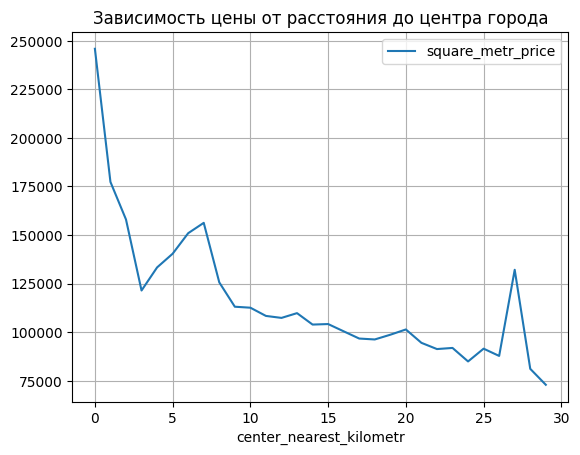

In [52]:
spb_pivot_table = data.query(
    'locality_name == "Санкт-Петербург"').pivot_table(index = 'center_nearest_kilometr', values = 'square_metr_price', aggfunc = 'mean')

spb_pivot_table.plot(grid = True, title = 'Зависимость цены от расстояния до центра города');

**Вывод:** 
Чем дальше от центра города, тем квартиры дешевле. В таблице и на графике хорошо видно, как снижается стоимость объектов по мере удаления от центра города.Самые дорогие квартиры расположны не далее 7 км от центра. Но также видим еще один небольшой пик примерно в 27 км от города. Возможно это обусловлено элитной загородной недвижимостью.

## Общий вывод.
Рассмотрели данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
На этапе предобработки данных увидели, что пропуски есть во всех столбцах, кроме total_images (число фотографий квартиры в объявлении), last_price(цена на момент снятия с публикации), total_area(общая площадь), first_day_exposition (дата публикации), rooms(число комнат), floor (этаж), studio (квартира-студия), open_plan(свободная планировка). Отсутствие пропусков или их маленькое значение в столбцах вероятно связано с тем, что это основные критерии поиска недвижимости, дата публикации скорее всего устанавливается автоматически.Больше всего пропусков в столбцах, которые не имеют стратегического значения, такие как наличие парка, водоема, расстояние. 
 В данных не так много выбивающихся значений. Убрали нереальные значения. Некоторые строки пришлось удалить, так как они мешали анализу.
 Основная доля - это недвижимость площадью до 100 кв м, что больше всего недвижимости, которая имеет жилую площадь до 50 кв.м., больше половины объектов имеет размер кухни 10 кв.м. В основном продается недвижимость с 1, 2 и 3 комнатами, имеет высоту потолков 2,5 - 3 м. В основном продаются квартиры до 10 этажа, на первых и последних намного меньше. Месторасположение - на протяженности 10 км от центра города и 30 км от аэропорта. Основные дни публикации объявления - это будни. Основные продажи - это весна, осень. В среднем объявление размещают 180 дней. 
На стомость влияют многие факторы: общая пложадь, этаж, размер кухни, расстояние до центра города. Чем ближе к центру, тем дороже. 
Таким образом, больше всего недвижимость по самой большой стомости продается в Санкт_Петербурге. Это неудивительно, так как это большой развитый город, а в области маленькие населенные пункты.
 